In [0]:
from zipfile import ZipFile
file_name='mydata.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras import optimizers

Using TensorFlow backend.


In [0]:
classifier=Sequential()

#step 1 convolution layer
classifier.add(Conv2D(64,3,3,input_shape=(128,128,3),activation='relu'))

#step 2 maxpooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

#another convolution -maxpooling layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))

classifier.add(Dropout(0.5))

classifier.add(Dense(units = 26, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(128, 128,..., activation="relu")`
  after removing the cwd from sys.path.


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'mydata/training_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'mydata/test_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


classifier.fit_generator(
        training_set,
        steps_per_epoch=1200,
        epochs=25,
        validation_data = test_set,
        validation_steps = 6500
      )

Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.
Epoch 1/25
1200/1200 [==============================] - 294s 245ms/step - loss: 0.6755 - acc: 0.7776 - val_loss: 0.2757 - val_acc: 0.9369
Epoch 2/25
1200/1200 [==============================] - 288s 240ms/step - loss: 0.4095 - acc: 0.8630 - val_loss: 0.1890 - val_acc: 0.9475
Epoch 3/25
1200/1200 [==============================] - 287s 239ms/step - loss: 0.2696 - acc: 0.9073 - val_loss: 0.1604 - val_acc: 0.9688
Epoch 4/25
1200/1200 [==============================] - 284s 237ms/step - loss: 0.1962 - acc: 0.9330 - val_loss: 0.1188 - val_acc: 0.9725
Epoch 5/25
1200/1200 [==============================] - 287s 239ms/step - loss: 0.1549 - acc: 0.9473 - val_loss: 0.1306 - val_acc: 0.9732
Epoch 6/25
1200/1200 [==============================] - 292s 243ms/step - loss: 0.1234 - acc: 0.9569 - val_loss: 0.1234 - val_acc: 0.9746
Epoch 7/25
1200/1200 [==============================] - 292s 244ms/step - loss: 0.109

In [0]:
### END ### The Below codes are not related to the project

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
classifier.save('classifier2.h5')
model_file = drive.CreateFile({'hand_gesture_recognition2' : 'classifier2.h5'})                       
model_file.SetContentFile('classifier2.h5')                       
model_file.Upload()

In [0]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1JETXKNw5dIUt41fVQFI9PHmOpvw-Uf9a'})

In [0]:
classifier.save_weights('classifier_weights2.h5')
weights_file = drive.CreateFile({'hand_gesture_recognition_weights2' : 'classifier_weights2.h5'})
weights_file.SetContentFile('classifier_weights2.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1PYaIKg6rfPdq47ry6YYxp5VdJxxfKVlz'})

In [0]:
import cv2

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
cap=cv2.VideoCapture()
while(cap.isOpened()):
    ret,frame=cap.read()
    frame=cv2.flip(frame,1)
    img = cv2.rectangle(frame, (425, 100), (625, 300), (0, 255, 0), thickness=2, lineType=8, shift=0)
    cropped = img[102:298, 427:623]
    hsv_converted = cv2.cvtColor(cropped, cv2.COLOR_BGR2HSV)
    hsv_mask=cv2.inRange(hsv_converted,np.array([0, 48, 80]),np.array([20, 255, 255]))
    blurred=cv2.GaussianBlur(hsv_mask,(5,5),0)
#     _,blurred=cv2.threshold(blurred,20,255,cv2.THRESH_BINARY)
#     dilated=cv2.dilate(blurred,kernal,iterations=2)


    eroded = cv2.erode(blurred, kernel, iterations = 1)
    dilated = cv2.dilate(eroded, kernel, iterations = 1)
    
    dilated=cv2.resize(dilated,(64,64))
    
    
    cv2.imshow("image",img)
    cv2.imshow("cropped",cropped)
    cv2.imshow("hsv_converted",hsv_converted)
    cv2.imshow("hsv mask",hsv_mask)
    cv2.imshow("Blurred hsv_mask",blurred)
    cv2.imshow("Dilated hsv_mask",dilated)
    if(cv2.waitKey(1)==27):
        break
cv2.destroyAllWindows()
cap.release()

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


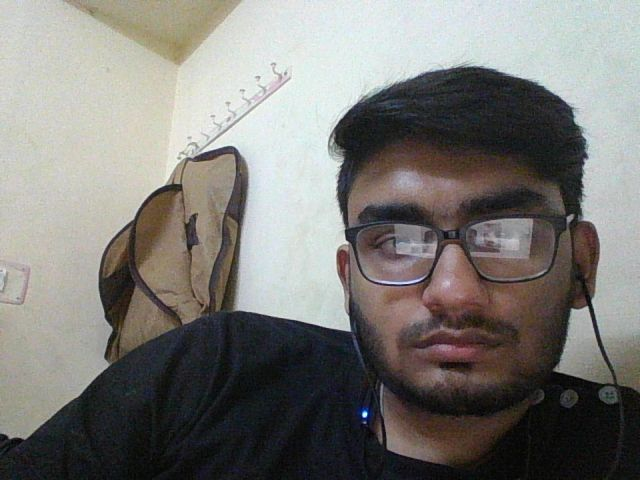

<IPython.core.display.Image object>


In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
  print(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   206k      0 --:--:-- --:--:-- --:--:--  206k


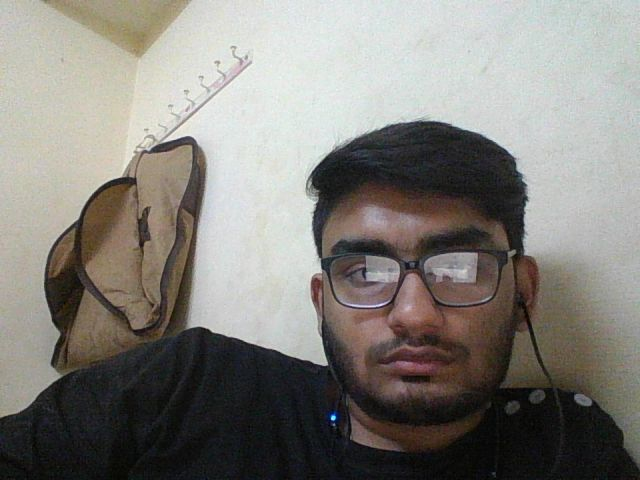

In [0]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)